# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns
import time

notebookstart = time.time()

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2021-09-24T11:26:05.521318+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

numpy  : 1.18.1
nicaviz: 0.0.7
seaborn: 0.10.1
pandas : 1.2.3



In [3]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 5000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
562,0,1,e,t,blue,False,2.576065,-1.383486,2019-07-17,2018-02-14 05:44:22
2513,0,16,g,t,blue,True,3.670559,-11.755001,2024-11-18,2018-02-09 01:40:04
4455,4,13,d,r,red,True,7.144216,16.002141,2030-03-14,2018-01-05 19:46:33
2246,4,13,b,t,blue,False,8.640311,3.794704,2024-02-25,2018-02-10 09:16:10
1779,2,11,a,w,blue,False,7.608386,-13.384348,2022-11-15,2018-01-05 17:58:07
2509,2,6,e,q,red,False,0.279406,8.307604,2024-11-14,2018-01-01 10:59:58
2277,2,2,f,q,blue,False,6.663744,11.521682,2024-03-27,2018-02-08 15:36:01
2006,2,17,g,e,red,False,4.097314,-11.786643,2023-06-30,2018-02-14 05:10:04
599,4,7,a,y,blue,False,9.774657,14.765756,2019-08-23,2018-02-02 20:26:23
4614,2,5,d,w,red,True,5.090777,-7.740334,2030-08-20,2018-02-18 13:02:26


In [4]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,0,18,d,y,red,False,7.864562,-12.838467,2018-01-01,2018-02-03 10:27:17
1,3,11,d,y,blue,False,7.604647,8.142199,2018-01-02,2018-01-29 23:37:15
2,2,9,e,q,red,False,5.073511,-1.161312,2018-01-03,2018-01-10 05:32:12
3,4,18,f,t,blue,True,1.913866,1.241720,2018-01-04,2018-02-05 16:21:33
4,2,4,f,t,blue,True,4.697957,7.779271,2018-01-05,2018-02-15 01:55:29


In [5]:
df.nica.categorical_describe()

Dataframe Dimension: 5000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,1,1055,0,1027,2,987.0,3,973.0,4,958.0
int_med,20,0,int64,9,286,2,276,19,267.0,6,263.0,15,262.0
str_med,7,0,object,g,741,d,733,e,719.0,b,715.0,a,708.0
str_med_two,6,0,object,y,874,q,844,t,826.0,r,823.0,e,821.0
str_small,2,0,object,blue,2560,red,2440,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,True,2544,False,2456,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,5000,0,float64,5.720905,1,7.289993,1,4.739067,1.0,7.922212,1.0,0.662603,1.0
cont_uni,5000,0,float64,-23.619017,1,-8.185322,1,-4.922396,1.0,-11.318551,1.0,-5.81822,1.0
date,5000,0,datetime64[ns],2026-04-30 00:00:00,1,2020-10-31 00:00:00,1,2021-09-28 00:00:00,1.0,2030-04-04 00:00:00,1.0,2025-12-02 00:00:00,1.0


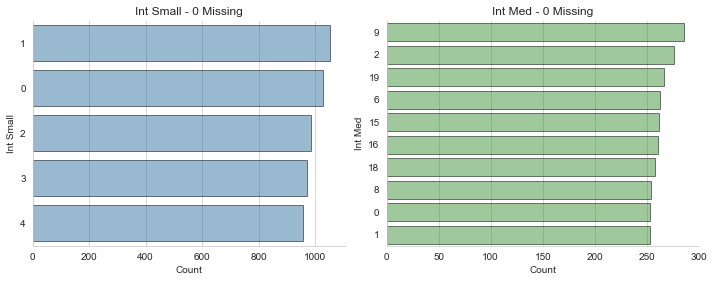

In [6]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

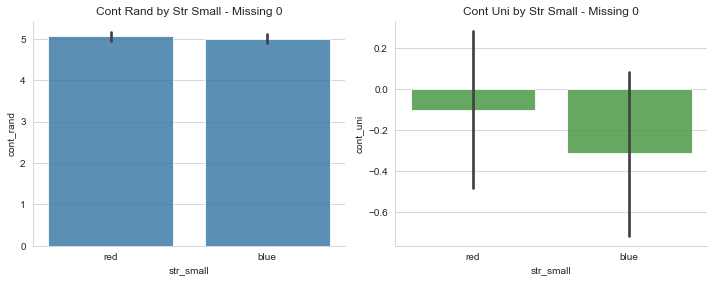

In [7]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    x_var = "str_small",
    plottype = "bar")

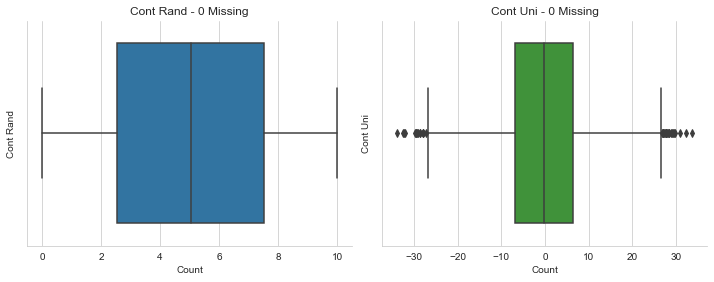

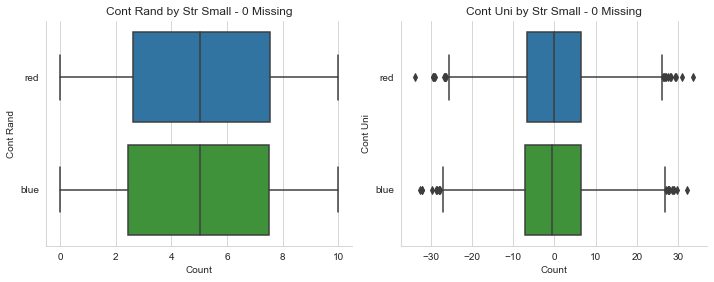

In [8]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "boxplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "boxplot")

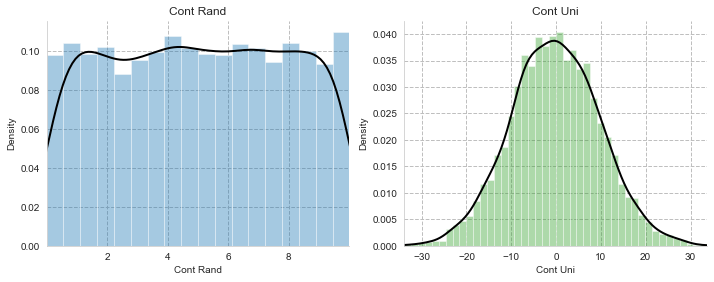

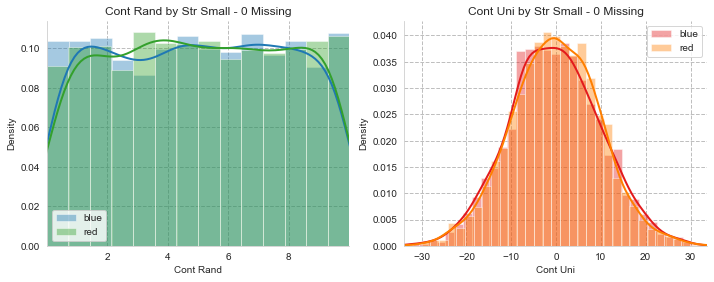

In [9]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "distplot")

df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "str_small",
    plottype = "distplot")

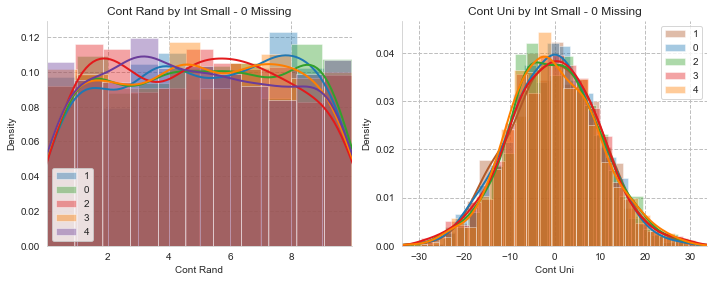

In [10]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    hue = "int_small",
    plottype = "distplot")

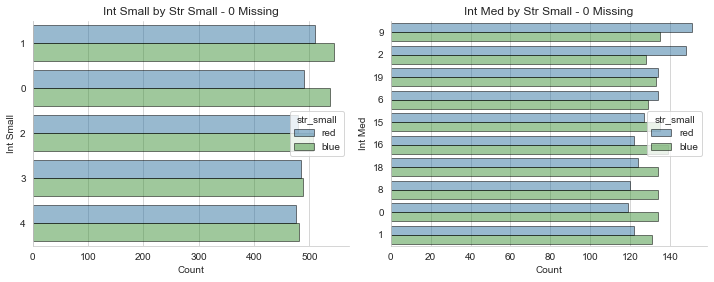

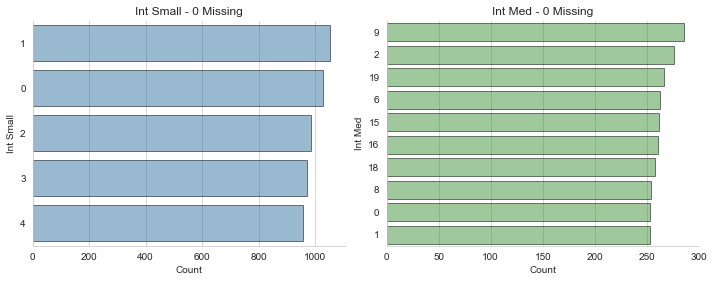

In [11]:
df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    hue = "str_small",
    plottype = "countplot")

df.nica.mass_plot(
    plt_set= ["int_small", "int_med"],
    plottype = "countplot")

### Time Series

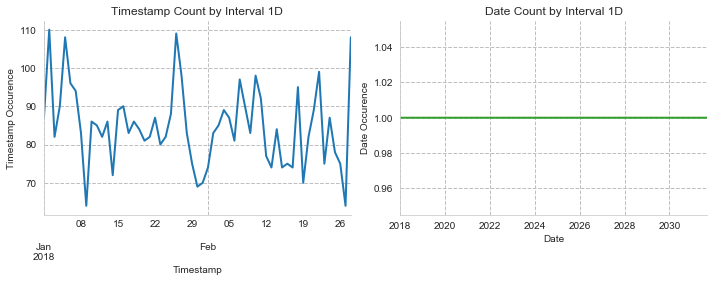

In [12]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    resample_interval="1D"
)

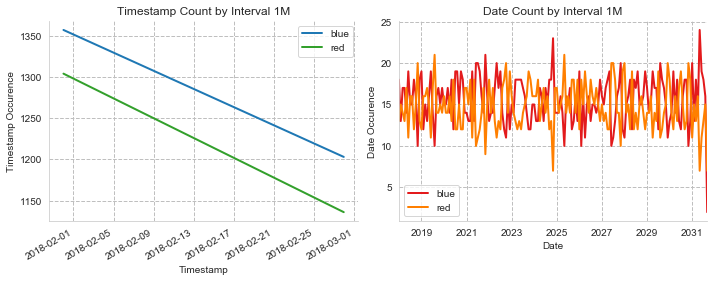

In [13]:
df.nica.mass_plot(
    plt_set= ["timestamp", "date"],
    plottype = "ts_resample",
    resample=True,
    hue = "str_small",
    resample_interval="1M"
)

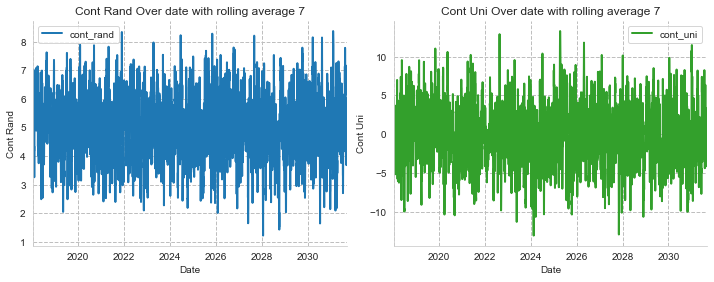

In [14]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    x_var="date",
    rolling=True,
    r=7
)

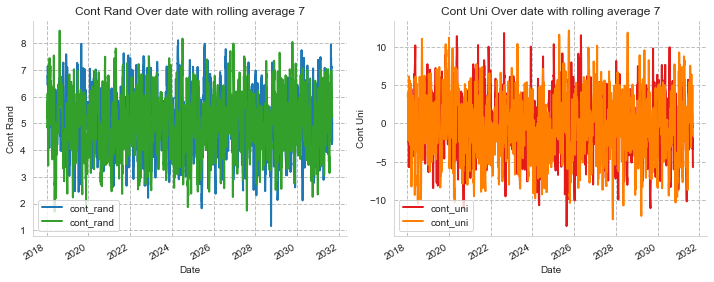

In [15]:
df.nica.mass_plot(
    plt_set= ["cont_rand", "cont_uni"],
    plottype = "ts_rolling",
    hue = "str_small",
    x_var="date",
    rolling=True,
    r=7
)

### WordClouds

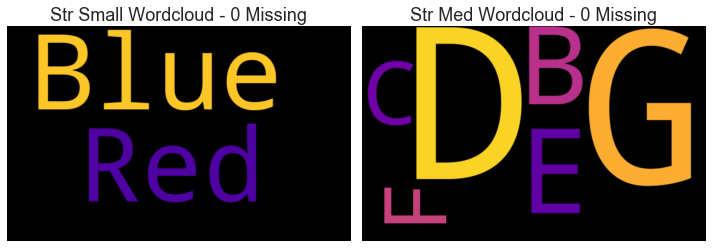

In [16]:
df.nica.mass_plot(
    plt_set= ["str_small", "str_med"],
    plottype = "wordcloud")

### Rank Correlations

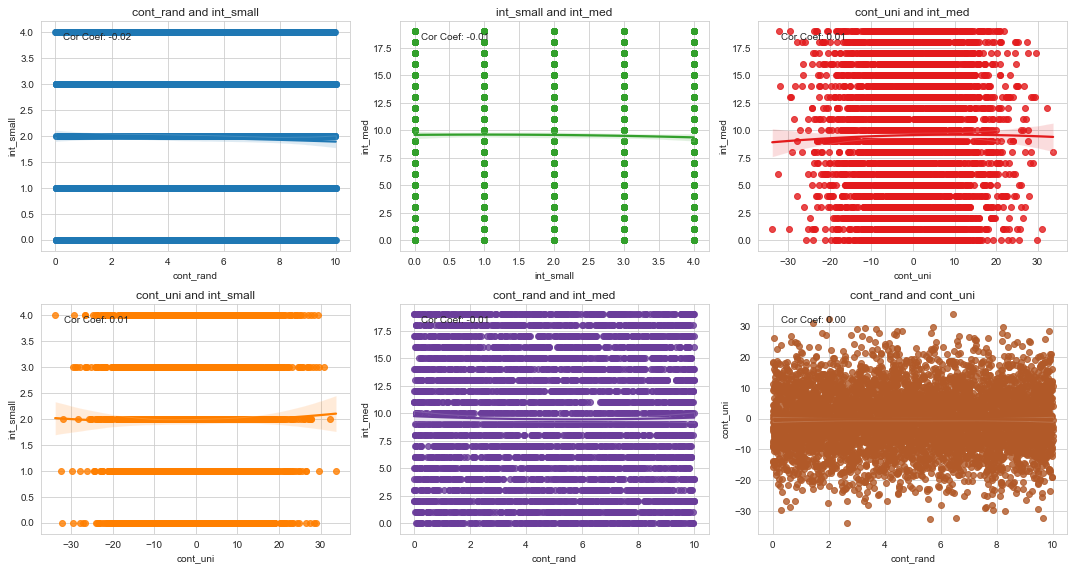

In [17]:
df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

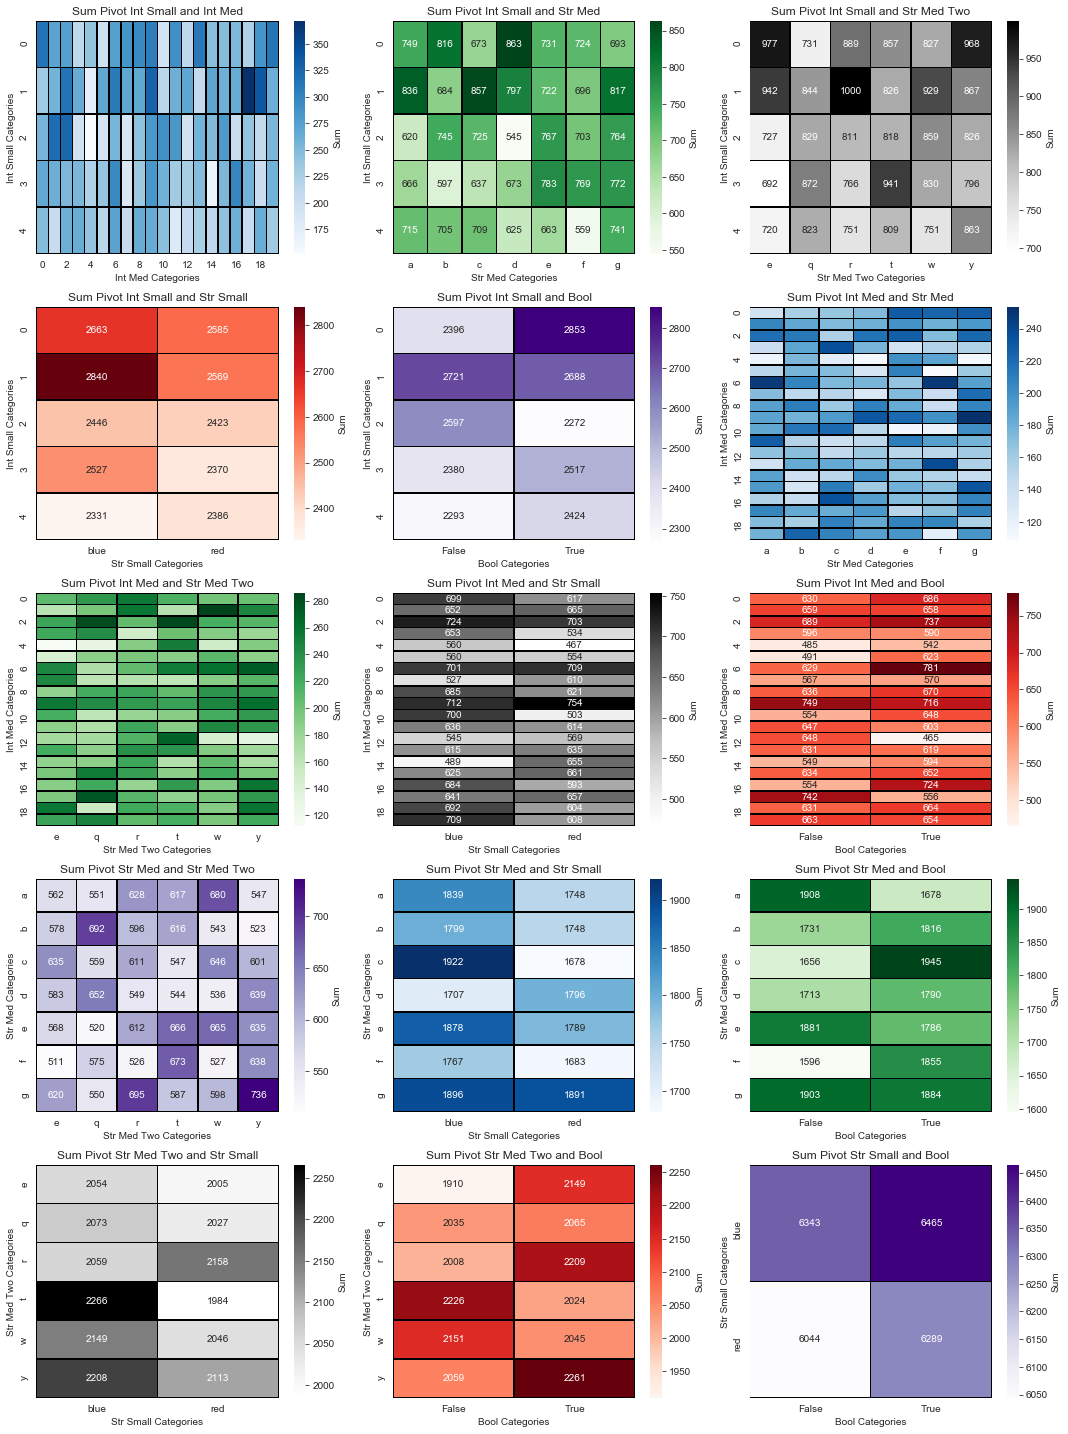

In [18]:
categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
df.nica.pivot_plots(categorical, "cont_rand", np.sum)

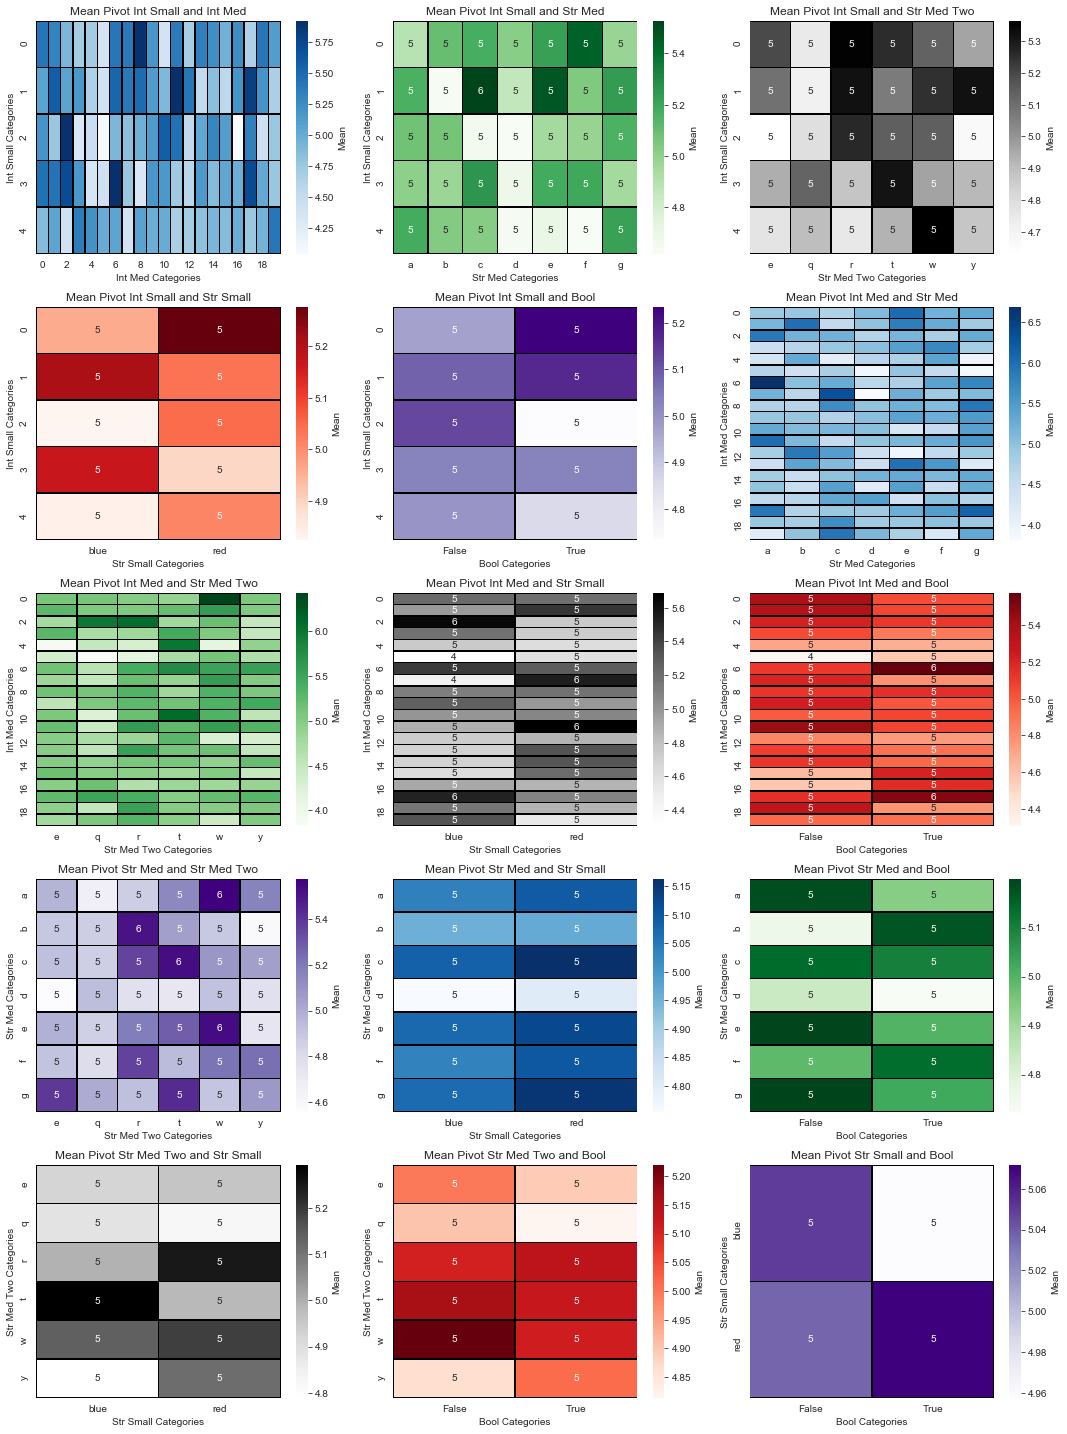

In [19]:
df.nica.pivot_plots(categorical, "cont_rand", np.mean)

In [20]:
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))

Notebook Runtime: 0.58 Minutes
